In [1]:
import sys
sys.path.append('./packages')
sys.path.append('./wrappers')
from dataset_wrapper import initialise_dataset

In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Modify to suit local machine
data_path = '../data/'

In [4]:
# Select what datatypes you would like to load from the dataset
# flair: Fluid-Attenuated Inversion Recovery. Highlights edema (swelling around tumor)
# t1: Standard T1-weighted scan. Good anatomical detail
# t1ce: T1-weighted with contrast enhancement. Shows areas where tumor enhances after injection of gadolinium
# t2: T2-weighted scan. Bright scan for fluids

modalities = ["flair", "t1", "t1ce", "t2"]

In [5]:
# DO NOT TOUCH
mod_dic = {}
for index, modality in enumerate(modalities):
    mod_dic[modality] = index

In [6]:
# This line should only every be ADDED to, and NOT subtracted from
# Import more functions if needed. Add them to transformations to apply them to data
from monai.transforms import Compose, LoadImaged, EnsureChannelFirstd, ToTensord

In [7]:
# Pre-processing. Add as many pre-processing transformations as you wish. Must be from monai
# IMPORTANT: Must start with LoadImaged, EnsureChannelFirstd and end with ToTensord. Any other transformations must be placed between the start and end
transformations = Compose([
    LoadImaged(keys=["image", "seg_mask"]),  # loads NIfTI files
    EnsureChannelFirstd(keys=["image"]),  # ensures channel dimension exists
    # Add personal transformations here
    ToTensord(keys=["image", "seg_mask"])  # convert both to torch tensors
])

In [8]:
# Initialises dataset that you can operate on
# Loads data DYNAMICALLY
dataset = initialise_dataset(data_path, modalities=modalities, transformations=transformations)

In [9]:
# Select Patient to observe
patient_id = 23
image, segmentation_mask = dataset.__getitem__(patient_id)

In [10]:
# Select what MODALITY to visualise
modality = 'flair'
modality = mod_dic[modality]

image_selected_mod = image[modality,:,:,:]
image_selected_mod = image_selected_mod.squeeze(0)

In [11]:
slice_idx = 80  # pick any slice

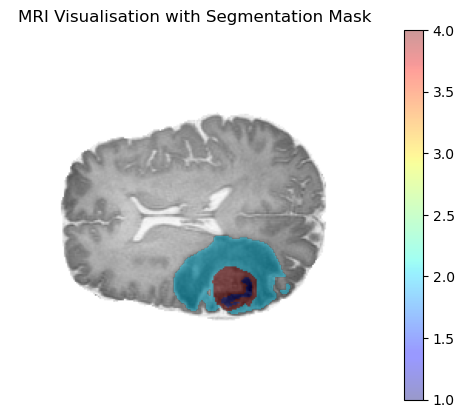

In [12]:
plt.imshow(image_selected_mod[:, :, slice_idx], cmap='gray_r')
plt.imshow(np.ma.masked_where(segmentation_mask[:, :, slice_idx] == 0, segmentation_mask[:, :, slice_idx]), cmap='jet', alpha=0.4), plt.colorbar()
plt.title("MRI Visualisation with Segmentation Mask")
plt.axis('off')
plt.show()